# **Exploratory Data Analysis(EDA)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [38]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\All\\Documents'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [39]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [40]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\All'

# Section 1

Section 1 content

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("dataset/sales.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'dataset/sales.csv'

In [ ]:
df[df["Quantity"]<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [ ]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [ ]:
df["Revenue"] = df["Price"] * df["Quantity"]
df['InvoiceDate_Year'] = df['InvoiceDate'].dt.year
df['InvoiceDate_Month'] = df['InvoiceDate'].dt.month
df['InvoiceDate_Day'] = df['InvoiceDate'].dt.day

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,InvoiceDate_Year,InvoiceDate_Month,InvoiceDate_Day
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009,12,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,12,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,12,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,2009,12,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009,12,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805549 entries, 0 to 805548
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            805549 non-null  int64         
 1   StockCode          805549 non-null  object        
 2   Description        805549 non-null  object        
 3   Quantity           805549 non-null  int64         
 4   InvoiceDate        805549 non-null  datetime64[ns]
 5   Price              805549 non-null  float64       
 6   Customer ID        805549 non-null  int64         
 7   Country            805549 non-null  object        
 8   Revenue            805549 non-null  float64       
 9   InvoiceDate_Year   805549 non-null  int32         
 10  InvoiceDate_Month  805549 non-null  int32         
 11  InvoiceDate_Day    805549 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(3), object(3)
memory usage: 64.5+ MB


In [ ]:
country_transactions = df.groupby('Country')['Invoice'].nunique()
country_transactions = country_transactions.sort_values(ascending=False)
country_percent = country_transactions / country_transactions.sum() * 100

country_percent

Country
United Kingdom          90.727366
Germany                  2.134221
France                   1.660851
EIRE                     1.533717
Netherlands              0.616733
Spain                    0.416565
Belgium                  0.403040
Sweden                   0.281317
Australia                0.256972
Portugal                 0.251562
Switzerland              0.243447
Italy                    0.175823
Finland                  0.154183
Channel Islands          0.148773
Austria                  0.121724
Norway                   0.121724
Denmark                  0.116314
Cyprus                   0.100084
Japan                    0.089264
Poland                   0.075739
USA                      0.054099
Greece                   0.048689
Unspecified              0.043280
Singapore                0.029755
United Arab Emirates     0.029755
Malta                    0.024345
Canada                   0.021640
Iceland                  0.021640
Israel                   0.018935
Lithua

This tells us that majority of the customers come from the United Kingdom, which makes sense as the company is based and registered in the same country.

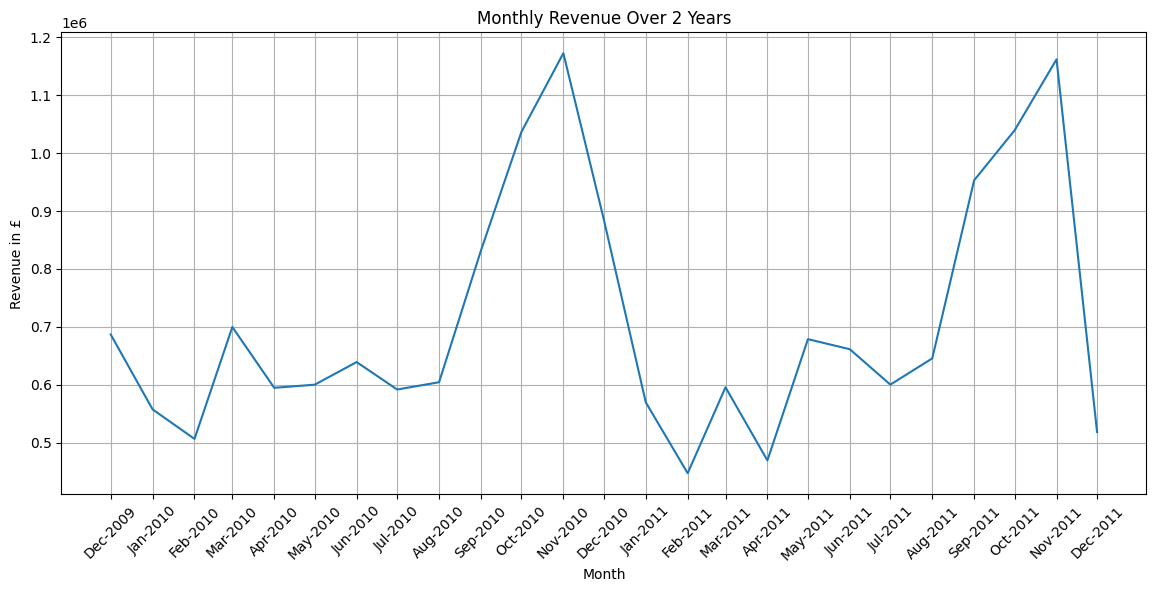

In [ ]:
monthly_revenue = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Revenue'].sum()

monthly_revenue.index = monthly_revenue.index.to_timestamp()

month_labels = monthly_revenue.index.strftime('%b-%Y') 

plt.figure(figsize=(14,6))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.title('Monthly Revenue Over 2 Years')
plt.xlabel('Month')
plt.ylabel('Revenue in £')
plt.grid(True)

# Set x-axis labels
plt.xticks(ticks=monthly_revenue.index, labels=month_labels, rotation=45)

plt.show()

In [ ]:
for row in sorted(df["Price"].dropna().unique()):
    print(row)

0.001
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.24
0.25
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.42
0.45
0.48
0.49
0.5
0.52
0.53
0.55
0.58
0.59
0.6
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.72
0.73
0.74
0.75
0.76
0.78
0.79
0.8
0.82
0.83
0.85
0.86
0.87
0.88
0.89
0.9
0.92
0.94
0.95
0.98
1.0
1.01
1.02
1.04
1.05
1.06
1.08
1.1
1.11
1.12
1.15
1.18
1.19
1.2
1.23
1.24
1.25
1.27
1.3
1.33
1.38
1.4
1.42
1.43
1.45
1.46
1.47
1.48
1.49
1.5
1.52
1.53
1.55
1.57
1.58
1.59
1.6
1.63
1.64
1.65
1.66
1.67
1.68
1.69
1.7
1.71
1.74
1.75
1.79
1.8
1.85
1.86
1.87
1.88
1.9
1.92
1.93
1.95
1.96
1.97
1.98
2.0
2.02
2.04
2.08
2.1
2.12
2.15
2.16
2.17
2.2
2.21
2.22
2.25
2.26
2.29
2.3
2.31
2.32
2.33
2.35
2.36
2.39
2.4
2.41
2.42
2.46
2.47
2.48
2.49
2.5
2.54
2.55
2.56
2.6
2.62
2.65
2.66
2.67
2.69
2.7
2.75
2.8
2.84
2.85
2.89
2.9
2.92
2.95
2.96
2.99
3.0
3.12
3.13
3.15
3.16
3.17
3.18
3.2
3.21
3.24
3.25
3.26
3.28
3.29
3.3
3.32
3.35
3.37
3

In [37]:
df.sort_values(by="Price").tail(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,InvoiceDate_Year,InvoiceDate_Month,InvoiceDate_Day
220774,517483,M,Manual,1,2010-07-29 12:29:00,3610.50,12737,France,3610.50,2010,7,29
702893,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744,Singapore,3949.32,2011,10,19
716483,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536,France,4161.06,2011,10,27
716484,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,12536,France,4161.06,2011,10,27
94121,501766,M,Manual,1,2010-03-19 11:35:00,6958.17,15760,Norway,6958.17,2010,3,19
94205,501768,M,Manual,1,2010-03-19 11:45:00,6958.17,15760,Norway,6958.17,2010,3,19
526005,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75,2011,5,3
50554,496115,M,Manual,1,2010-01-29 11:04:00,8985.60,17949,United Kingdom,8985.60,2010,1,29
277542,524159,M,Manual,1,2010-09-27 16:12:00,10468.80,14063,United Kingdom,10468.80,2010,9,27
98315,502263,M,Manual,1,2010-03-23 15:22:00,10953.50,12918,United Kingdom,10953.50,2010,3,23


---

# Numerical Columns

Section 2 content

In [ ]:
numeric_cols = [
    "Quantity",
    "Price",
    "Revenue",
    "InvoiceDate_Year",
    "InvoiceDate_Month",
    "InvoiceDate_Day"
]

numeric_columns = df[numeric_cols]

### Distribution of values

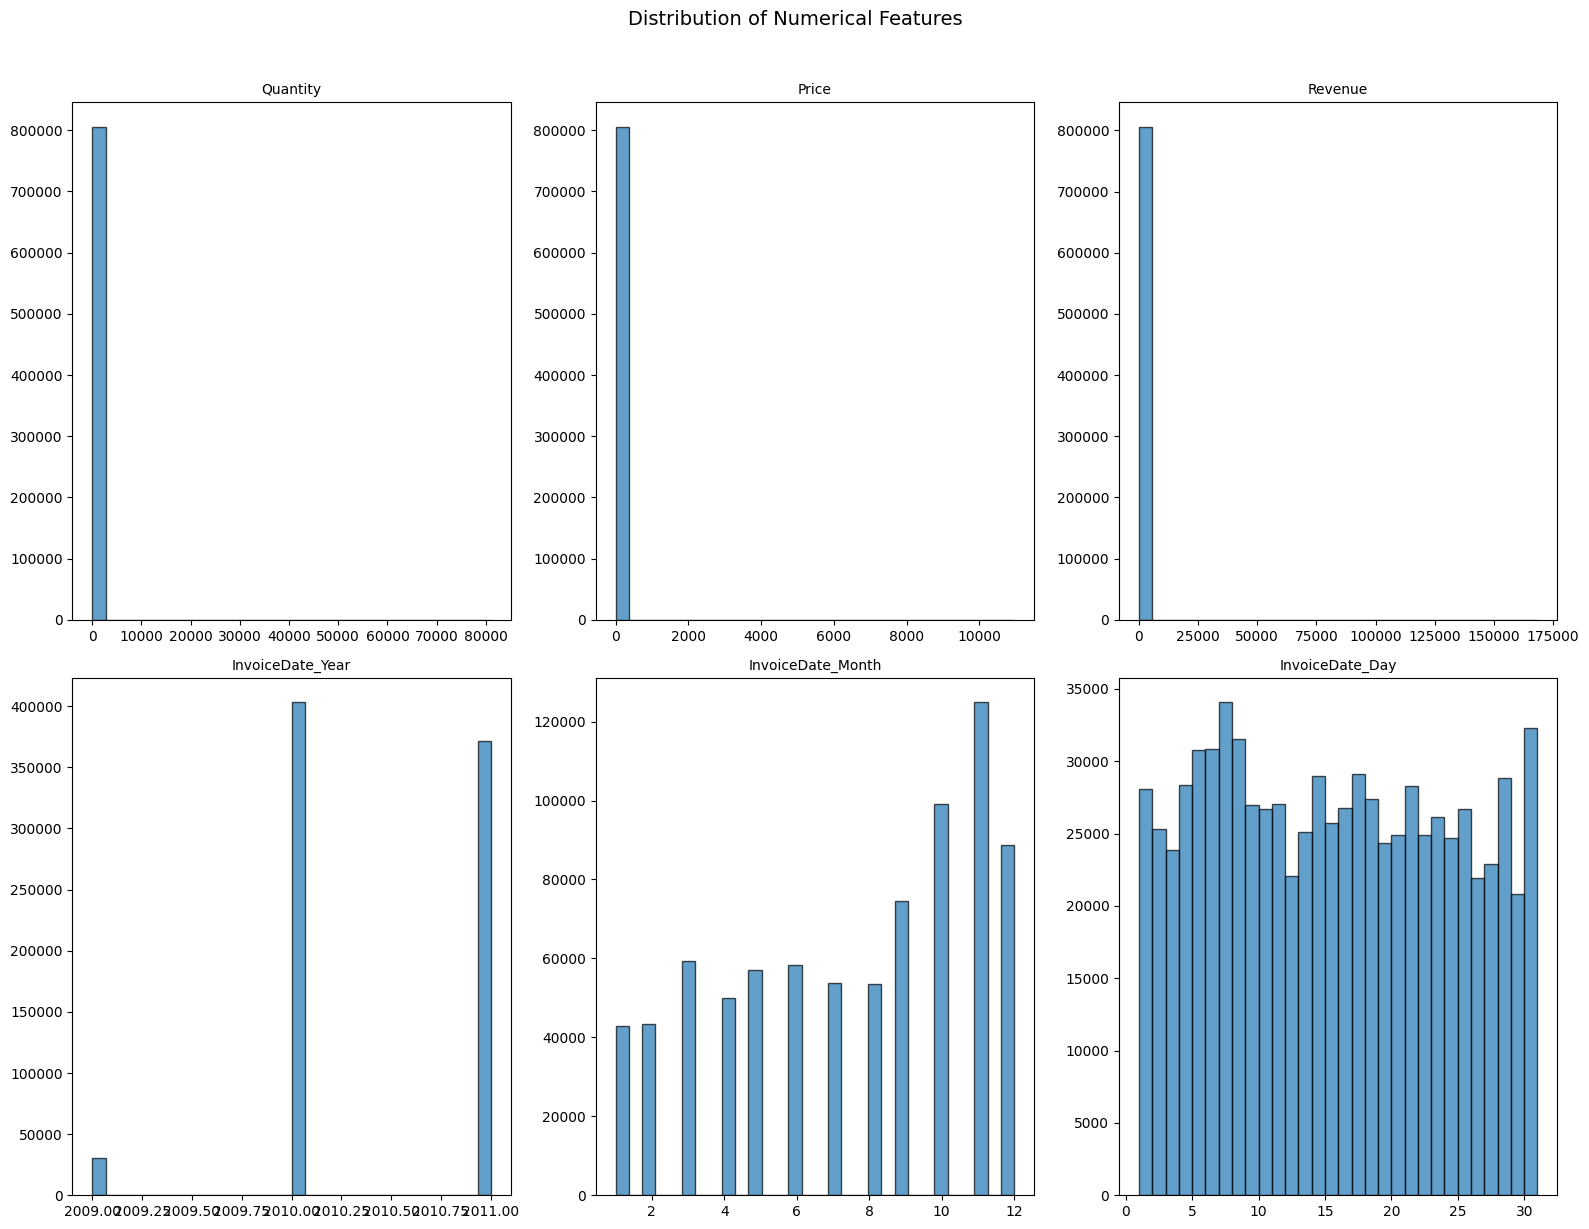

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 12))

axes = axes.ravel()

for idx, col in enumerate(numeric_columns.columns):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('')

plt.suptitle('Distribution of Numerical Features', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

The month of November has the most amount of transactions. This is likely due to the the Christmas season.

### Boxplot Distribution

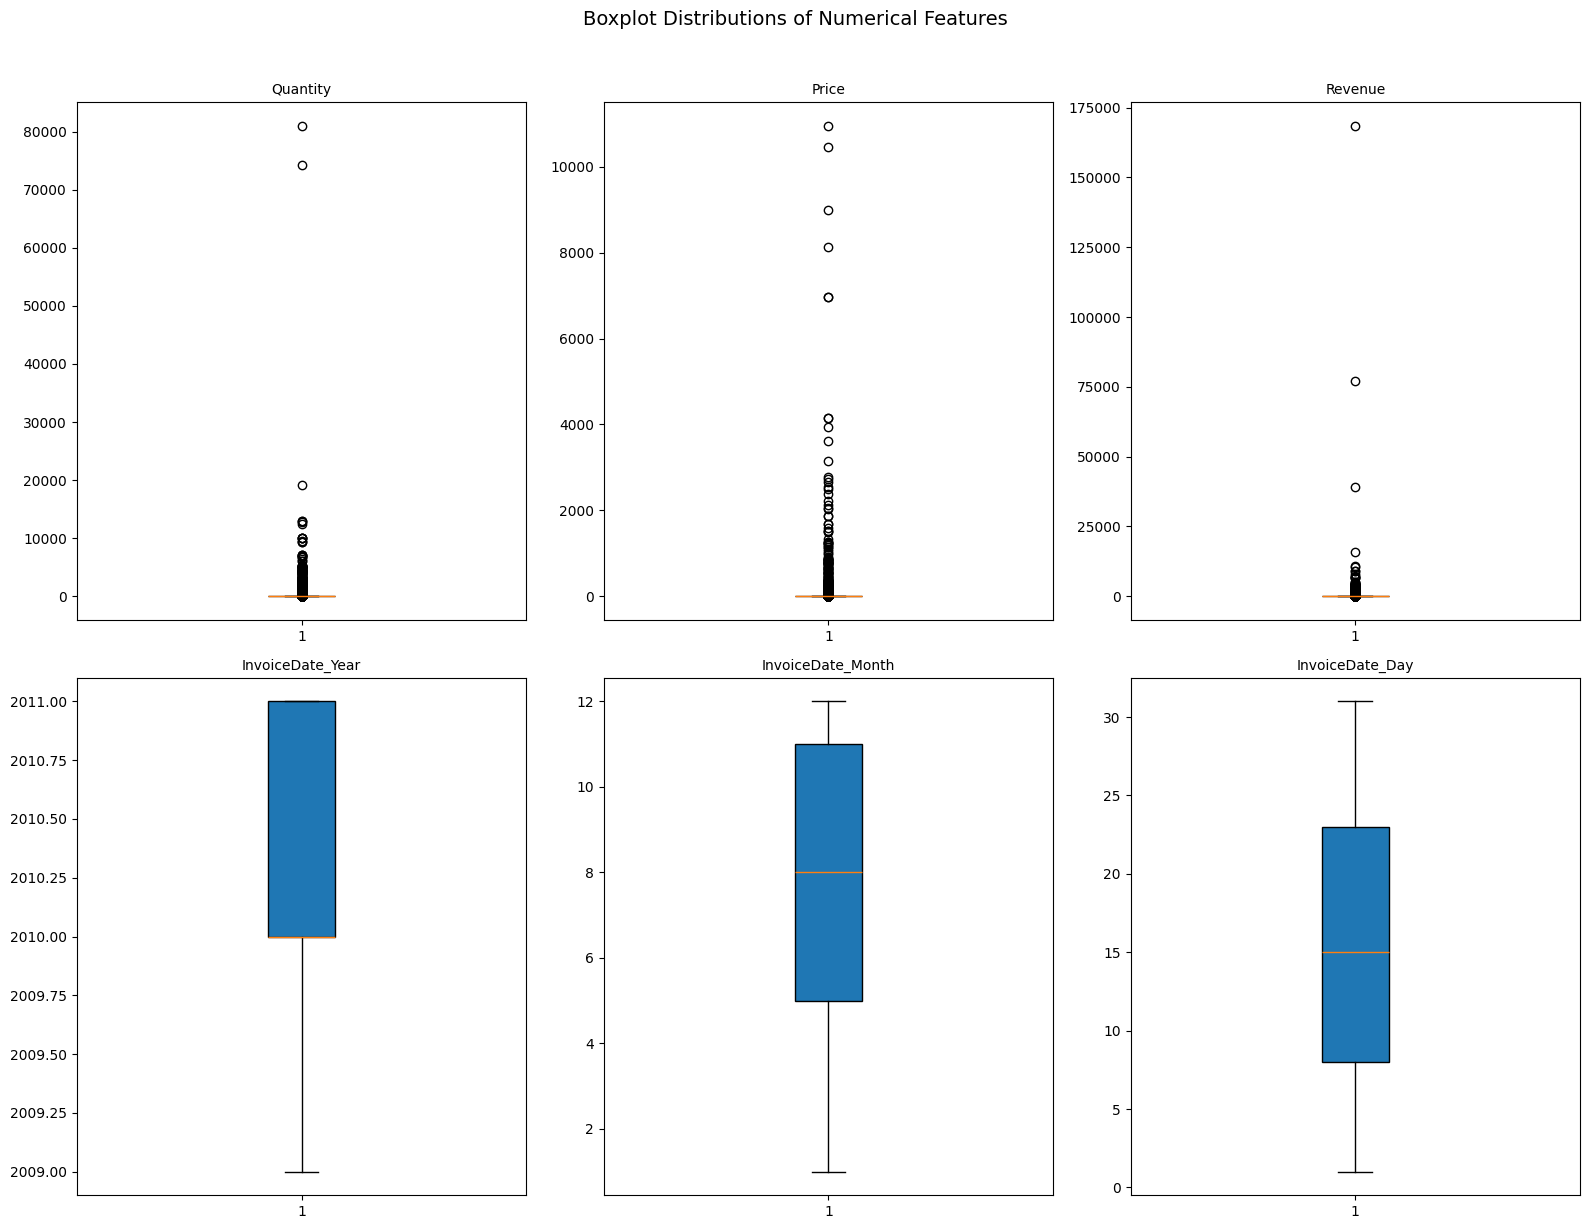

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 12))

axes = axes.ravel()

for idx, col in enumerate(numeric_columns.columns):
    axes[idx].boxplot(
        df[col].dropna(),
        vert=True,
        patch_artist=True
    )
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('')

plt.suptitle('Boxplot Distributions of Numerical Features', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### Correlation Analysis

In [ ]:
corr_matrix = numeric_columns.corr()
corr_matrix

,Quantity,Price,Revenue,InvoiceDate_Year,InvoiceDate_Month,InvoiceDate_Day
Quantity,1.000000,-0.004909,0.826590,-0.001165,-0.007047,-0.000943
Price,-0.004909,1.000000,0.135897,-0.002522,-0.004839,0.001852
Revenue,0.826590,0.135897,1.000000,0.001386,-0.003099,-0.002088
InvoiceDate_Year,-0.001165,-0.002522,0.001386,1.000000,-0.136044,0.065207
InvoiceDate_Month,-0.007047,-0.004839,-0.003099,-0.136044,1.000000,-0.140031
InvoiceDate_Day,-0.000943,0.001852,-0.002088,0.065207,-0.140031,1.000000


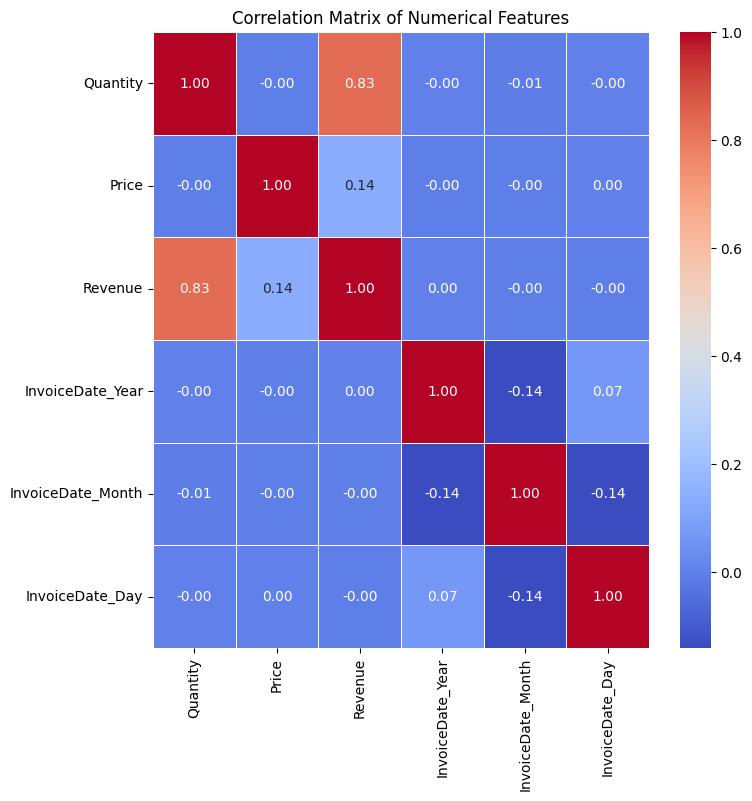

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

### Findings
- Strong Positive correlation between Revenue and Quantity: Quantity of an item has more impact on the Revenue than the price of an item
- Weak Negative correlation between Revenue and Price: Higher priced items may result in lower Revenue per transaction
- No Correlation between Price and Quantity: Quantity of items purchased are not dictated by the price of the items.

---

# Categorical

In [ ]:
categoric_columns = df.select_dtypes(include=["object"]).columns.tolist()
categoric_columns

['StockCode', 'Description', 'Country']

---

# Investigation

### List countries by revenue in total

In [ ]:
df.groupby("Country")["Revenue"].sum().sort_values(ascending=False)

Country
United Kingdom          1.472315e+07
EIRE                    6.216311e+05
Netherlands             5.542323e+05
Germany                 4.312625e+05
France                  3.552575e+05
Australia               1.699681e+05
Spain                   1.091785e+05
Switzerland             1.003653e+05
Sweden                  9.154972e+04
Denmark                 6.986219e+04
Belgium                 6.575342e+04
Norway                  6.010962e+04
Portugal                5.728530e+04
Japan                   4.713839e+04
Channel Islands         4.499676e+04
Italy                   3.255042e+04
Finland                 2.992554e+04
Singapore               2.531706e+04
Cyprus                  2.498013e+04
Austria                 2.361301e+04
Greece                  1.909619e+04
Poland                  1.090245e+04
Israel                  1.042109e+04
United Arab Emirates    9.202690e+03
Unspecified             8.613650e+03
USA                     8.366860e+03
Malta                   8.0990

### Revenue by Year, Month, Country

In [ ]:
df.groupby(["InvoiceDate_Year", "InvoiceDate_Month", "Country"])["Revenue"].sum()

InvoiceDate_Year  InvoiceDate_Month  Country        
2009              12                 Australia             271.10
                                     Austria              1998.34
                                     Belgium               447.60
                                     Channel Islands       989.18
                                     Cyprus               3556.98
                                                          ...    
2011              12                 Portugal             2808.19
                                     Spain                 316.21
                                     Sweden                238.00
                                     USA                   885.24
                                     United Kingdom     472384.17
Name: Revenue, Length: 546, dtype: float64

### Sorting most purchased products by quantity

In [ ]:
df.groupby("StockCode")["Quantity"].sum().sort_values(ascending=False)

StockCode
84077      109169
85099B      94983
85123A      93697
21212       91263
23843       80995
            ...  
20683           1
47569           1
35974           1
21409           1
TEST002         1
Name: Quantity, Length: 4631, dtype: int64

---

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)